In [1]:
%matplotlib inline

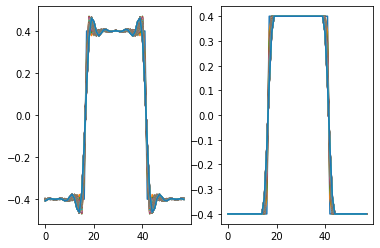

In [3]:
import numpy as np
from matplotlib import pyplot as plt

diff_weights = {
	2: [1, -2, 1],
	3: [-1, 3, -3, 1],
	4: [1, -4, 6, -4, 1],
	5: [-1, 5, -10, 10, -5, 1],
	6: [1, -6, 15, -20, 15, -6, 1],
	7: [-1, 7, -21, 35, -35, 21, -7, 1],
	8: [1, -8, 28, -56, 70, -56, 28, -8, 1]
}
diff_halo_width = {
	2: 1,
	3: 2,
	4: 2,
	5: 3,
	6: 3,
	7: 4,
	8: 4
}

ord = 8
w = diff_weights[ord]
ns = diff_halo_width[ord]
n = 50
dt = 1.0
dx = 1.0 / n
a = (dx / 2)**ord / dt
x = np.linspace(0.0 - ns * dx, 1.0 + (ns - 1) * dx, n + 2 * ns)

def classic_damp(ord, n, f, w, dt, dx, a):
	g = f.copy()
	for i in range(0, n):
		g[i+ns] = a * np.sum(f[i:i+2*ns+1] * w) / dx**ord
	return f + (-1)**(ord / 2 + 1) * dt * g

def simple_flux_limited_damp(ord, n, f, w, dt, dx, a):
	F = f.copy()
	w = diff_weights[ord - 1]
	ns = diff_halo_width[ord - 1]
	for i in range(0, n):
		F[i+ns] = (-1)**(ord / 2) * a * np.sum(f[i+1:i+2*ns+1] * w) / dx**(ord - 1)
	df = np.append(np.diff(f), 0)
	for i in range(0, n):
		F[i+ns] = F[i+ns] * np.maximum(0, np.sign(-F[i+ns] * df[i+ns]))
	F[ns-1] = F[n+ns-1]
	g = f.copy()
	for i in range(0, n):
		g[i+ns] = f[i+ns] - dt * (F[i+ns] - F[i+ns-1]) / dx
	return g

f = np.array([0.4 if 0.25 <= _x_ <= 0.75 else -0.4 for _x_ in x])
plt.subplot(1, 2, 1)
plt.plot(f)

k = 0
while k < 100:
	f = classic_damp(ord, n, f, w, dt, dx, a)
	f[0:ns] = f[n:n+ns]
	f[n+ns:] = f[ns:2*ns]
	plt.plot(f)
	k = k + 1

f = np.array([0.4 if 0.25 <= _x_ <= 0.75 else -0.4 for _x_ in x])
plt.subplot(1, 2, 2)
plt.plot(f)

k = 0
while k < 100:
	f = simple_flux_limited_damp(ord, n, f, w, dt, dx, a)
	f[0:ns] = f[n:n+ns]
	f[n+ns:] = f[ns:2*ns]
	plt.plot(f)
	k = k + 1